<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/2025/%EB%8F%84%EC%9E%A5%EA%B9%A8%EA%B8%B0/05_anomaly_process_Consumer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: 내 드라이브를 마운트(mount) 하라

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
file_path = '/content/drive/MyDrive/data/df.pkl'
import pandas as pd
df = pd.read_pickle(file_path)

df

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,토요일모바일,일요일모바일,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year
0,남,14,서울,학생(재수생포함),549.500000,중학교 재학,자가,미혼,2명,180.0,...,30.0,30.0,음악/공연/오디션,스포츠/골프,예능/오락,어린이/만화,로맨스 드라마,멜로 드라마,1,2018
1,남,14,서울,학생(재수생포함),749.500000,중학교 재학,자가,미혼,2명,60.0,...,30.0,60.0,국내 드라마,영화,예능/오락,음악/공연/오디션,가족 드라마,정통사극,0,2018
2,남,14,서울,학생(재수생포함),549.500000,중학교 재학,자가,미혼,2명,0.0,...,180.0,120.0,국내 드라마,예능/오락,음악/공연/오디션,예능/오락,형사/추리/법정 드라마,멜로 드라마,0,2018
3,남,14,서울,학생(재수생포함),749.500000,중학교 재학,전세,미혼,2명,90.0,...,120.0,120.0,국내 드라마,영화,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마,1,2018
4,남,14,서울,학생(재수생포함),549.500000,중학교 재학,자가,미혼,2명,60.0,...,60.0,60.0,해외 드라마,예능/오락,교육,예능/오락,로맨스 드라마,멜로 드라마,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,여,58,광주/전라/제주,기능/노무직,336.668937,중학교 졸업,자가,기타(이혼/별거/사별),2명,60.0,...,60.0,60.0,뉴스/보도,교양/생활정보,시사/토론,국내 드라마,로맨스 드라마,멜로 드라마,1,2019
7996,여,63,광주/전라/제주,전업주부,649.500000,고등학교 졸업,자가,기혼,2명,60.0,...,30.0,30.0,국내 드라마,예능/오락,예능/오락,예능/오락,로맨스 드라마,멜로 드라마,0,2019
7997,여,61,광주/전라/제주,기능/노무직,349.500000,중학교 졸업,전세,기혼,1명,60.0,...,30.0,30.0,뉴스/보도,국내 드라마,영화,예능/오락,로맨스 드라마,멜로 드라마,0,2019
7998,여,67,광주/전라/제주,기능/노무직,149.500000,중학교 졸업,자가,기타(이혼/별거/사별),2명,60.0,...,30.0,30.0,뉴스/보도,국내 드라마,예능/오락,예능/오락,로맨스 드라마,멜로 드라마,0,2019


In [6]:
# prompt: df 각 컬럼의 고유값, 결측치, 데이터형태를 요약하여 보여라

# Check for null values in each column
print(df.isnull().sum())

# Print the data type of each column
print(df.dtypes)

성별         0
연령         0
지역         0
직업         0
소득         0
학력         0
주거형태       0
결혼여부       0
자녀수        0
평일인터넷      0
토요일인터넷     0
일요일인터넷     0
평일모바일      0
토요일모바일     0
일요일모바일     0
TV장르1      0
TV장르2      0
TV장르3      0
TV장르4      0
국드장르1      0
국드장르2      0
PPL구입여부    0
year       0
dtype: int64
성별         category
연령         category
지역         category
직업         category
소득          float64
학력         category
주거형태       category
결혼여부       category
자녀수        category
평일인터넷      category
토요일인터넷     category
일요일인터넷     category
평일모바일      category
토요일모바일     category
일요일모바일     category
TV장르1      category
TV장르2      category
TV장르3      category
TV장르4      category
국드장르1      category
국드장르2      category
PPL구입여부    category
year       category
dtype: object


In [8]:
df['자녀수'].unique()

['2명', '1명', '3명 이상']
Categories (3, object): ['1명', '2명', '3명 이상']

In [9]:
# prompt: df['자녀수']의 값에서 수자만 추출하라

import pandas as pd
import re

def extract_number(text):
    if pd.isna(text):
        return None  # Handle NaN values
    match = re.search(r'\d+', str(text))
    if match:
        return int(match.group(0))
    else:
        return None

df['자녀수'] = df['자녀수'].apply(extract_number)
df['자녀수'].unique()


[2, 1, 3]
Categories (3, int64): [1, 2, 3]

In [10]:
df.columns

Index(['성별', '연령', '지역', '직업', '소득', '학력', '주거형태', '결혼여부', '자녀수', '평일인터넷',
       '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일', 'TV장르1', 'TV장르2',
       'TV장르3', 'TV장르4', '국드장르1', '국드장르2', 'PPL구입여부', 'year'],
      dtype='object')

In [11]:
# prompt: 연령, 자녀수, '평일인터넷', '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일' 등의 컬럼은 integer형태로 변환하라

# Convert specified columns to integer type
int_columns = ['연령', '자녀수', '평일인터넷', '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일']

for col in int_columns:
    # Handle potential errors during conversion
    try:
        df[col] = df[col].astype(int)
    except (ValueError, TypeError) as e:
        print(f"Error converting column '{col}' to integer: {e}")
        # Optionally, fill NaN values with a specific value or remove rows with NaN values
        # Example: df[col] = df[col].fillna(0).astype(int)
        # or: df = df.dropna(subset=[col])


# Print data types again to verify changes
df.dtypes

,0
성별,category
연령,int64
지역,category
직업,category
소득,float64
학력,category
주거형태,category
결혼여부,category
자녀수,int64
평일인터넷,int64


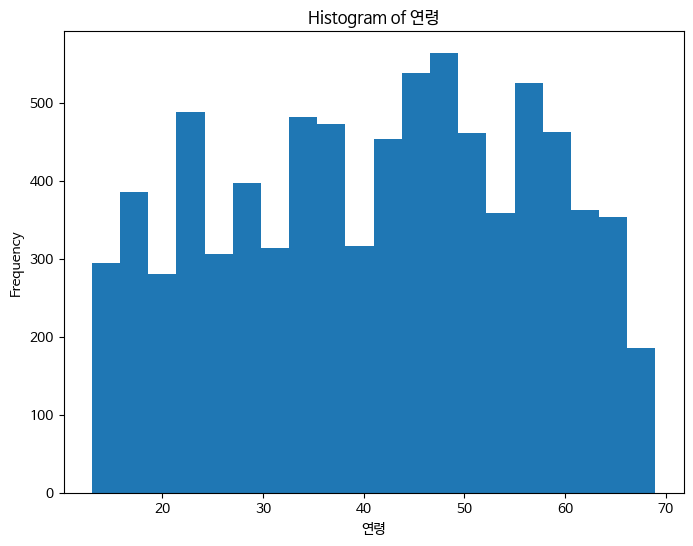

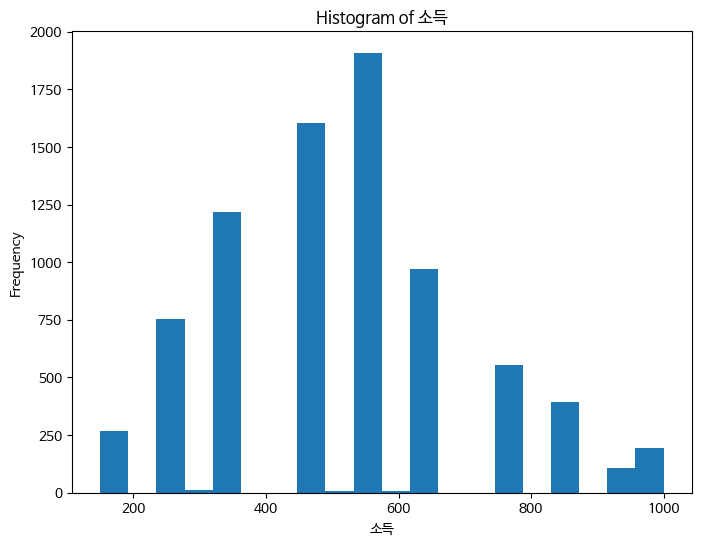

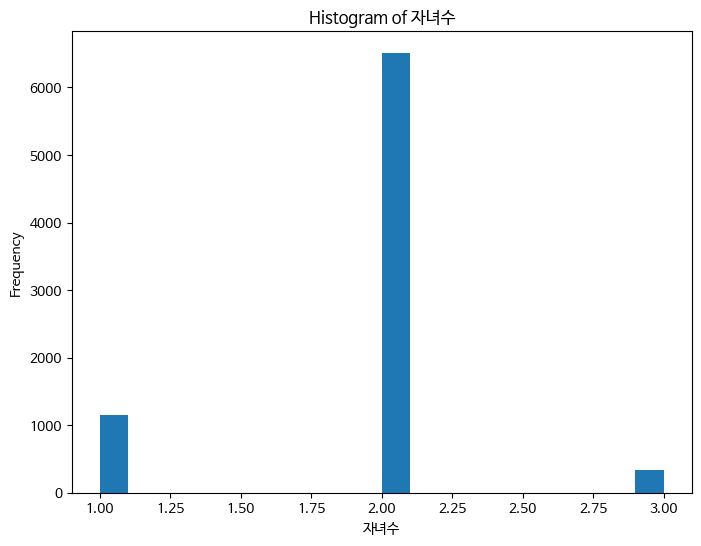

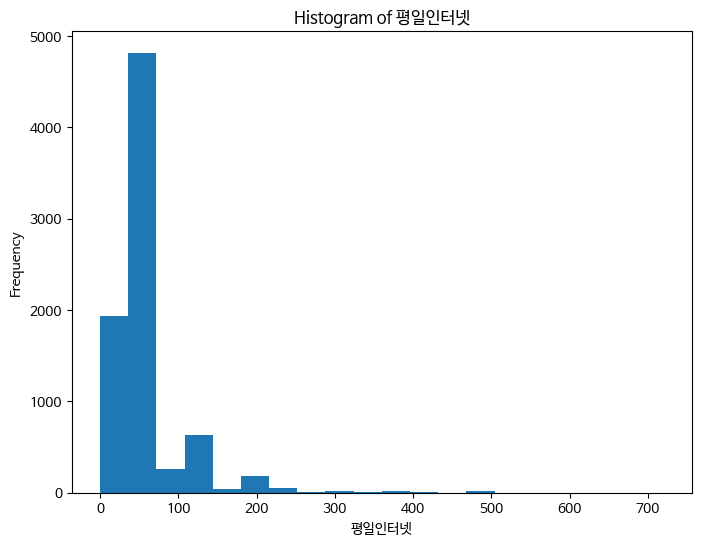

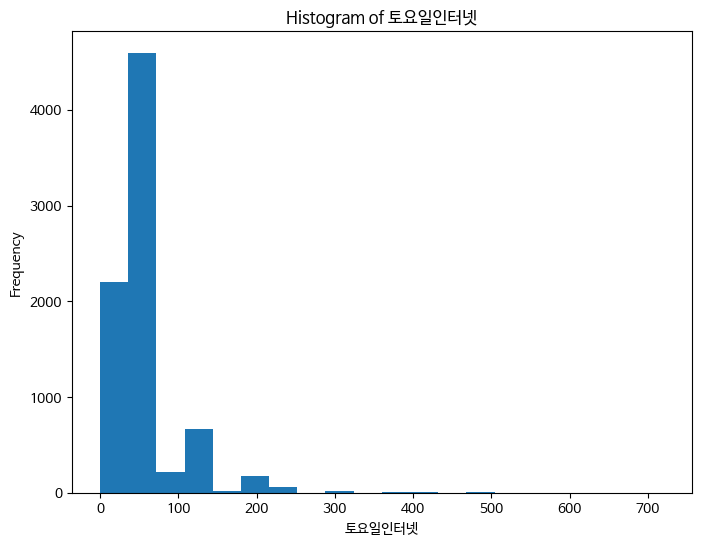

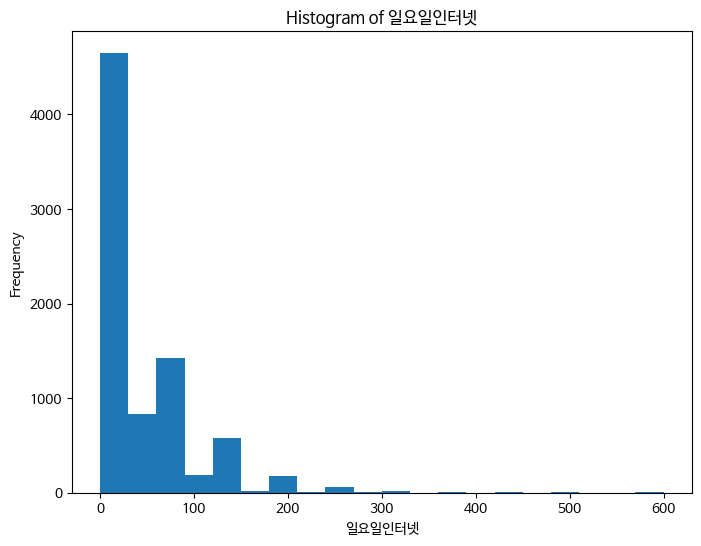

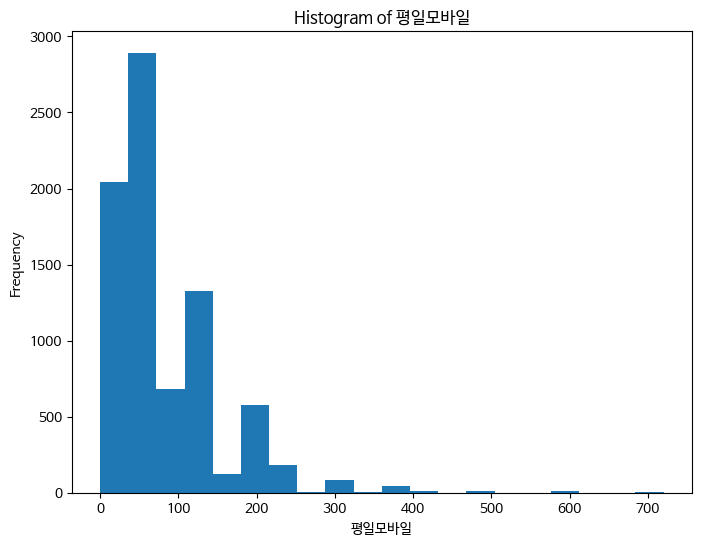

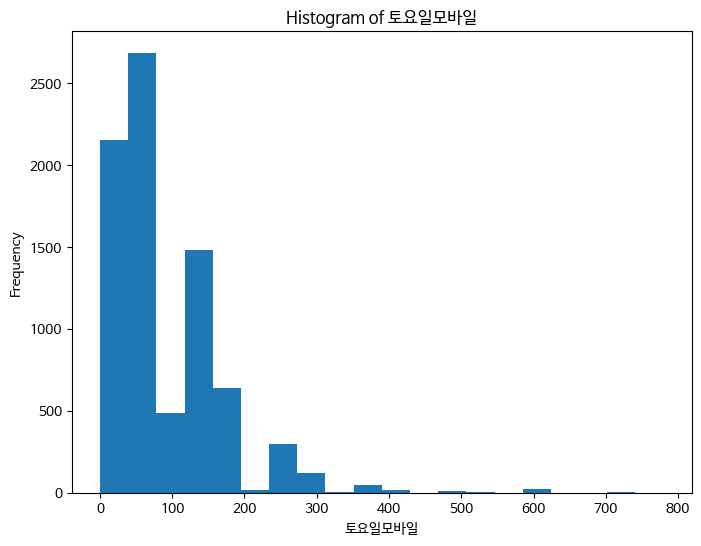

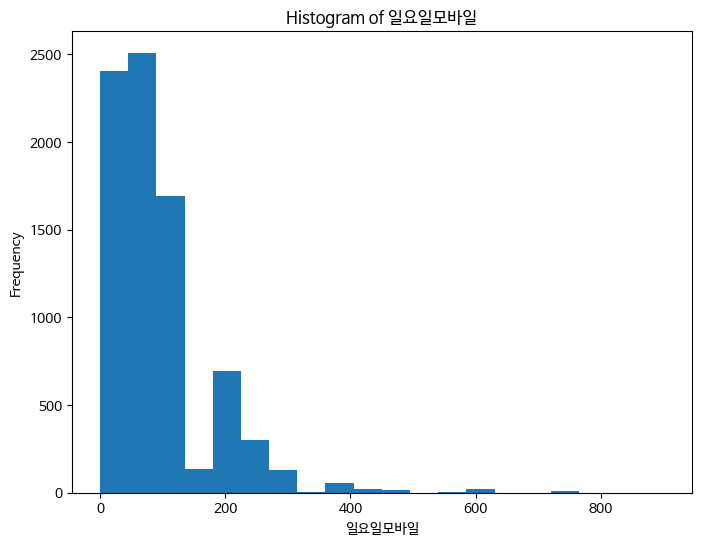

In [12]:
# prompt: inf64, float64 의 컬럼만 시각화해다오

import matplotlib.pyplot as plt

# Select columns with 'int64' or 'float64' data types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Iterate through the numeric columns and create histograms
for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(df[col].dropna(), bins=20)  # Drop NaN values before plotting
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# prompt: 수치형자료의 boxplot을 시각화 해줘

import matplotlib.pyplot as plt
# Select columns with 'int64' or 'float64' data types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Iterate through the numeric columns and create boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.boxplot(df[col].dropna(), vert=False)  # Drop NaN values before plotting
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [14]:
df.columns

Index(['성별', '연령', '지역', '직업', '소득', '학력', '주거형태', '결혼여부', '자녀수', '평일인터넷',
       '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일', 'TV장르1', 'TV장르2',
       'TV장르3', 'TV장르4', '국드장르1', '국드장르2', 'PPL구입여부', 'year'],
      dtype='object')

In [15]:
# prompt: '평일인터넷', '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일' 의 변수는 IQR을 기준으로 이상치를 조정해줘

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

columns_to_adjust = ['평일인터넷', '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일']

for col in columns_to_adjust:
    df = remove_outliers_iqr(df, col)


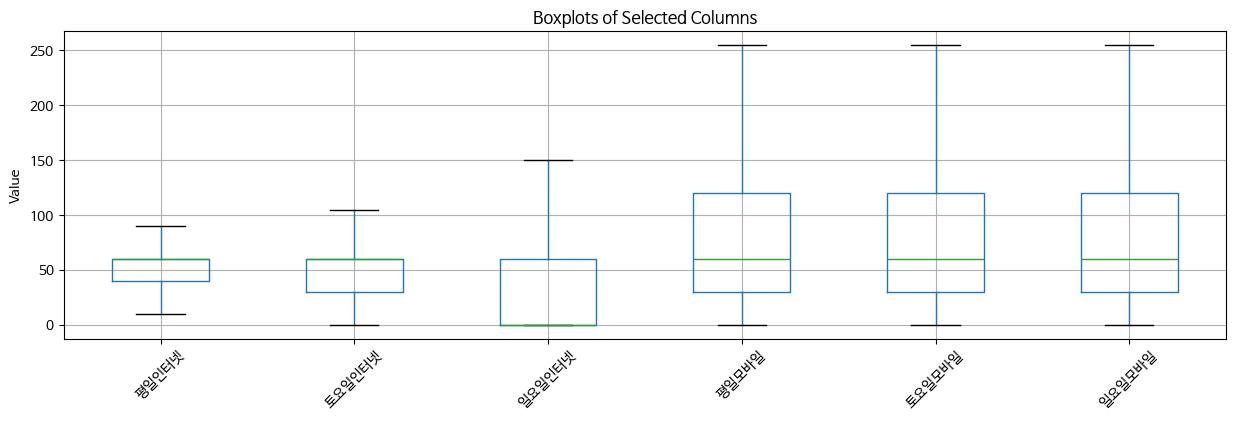

In [17]:
# prompt: columns_to_adjust 의 변수를 모두 한 번에 상자그림으로
# Assuming 'df' and 'columns_to_adjust' are defined as in your previous code

plt.figure(figsize=(15, 4))  # Adjust figure size as needed
df.boxplot(column=columns_to_adjust)
plt.title('Boxplots of Selected Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


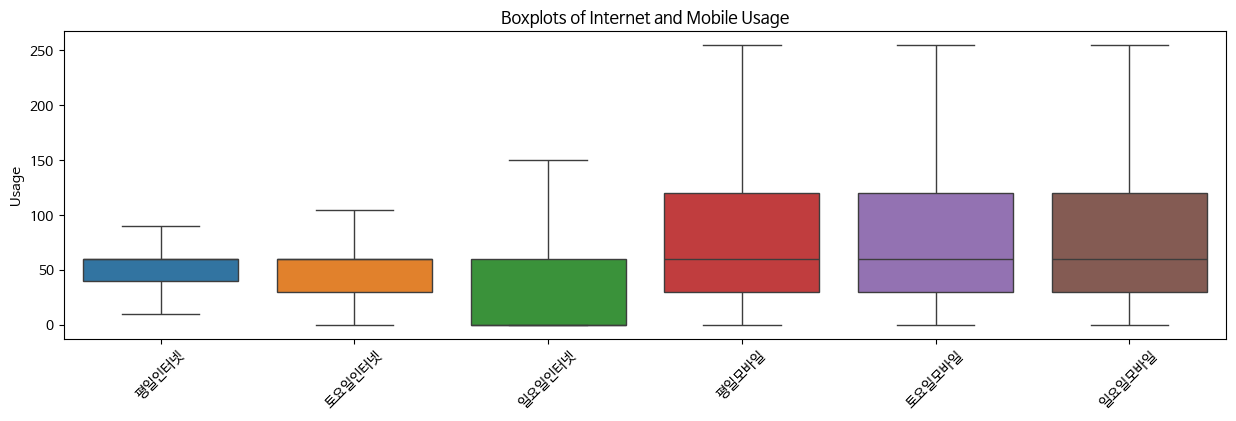

In [18]:
# prompt: seaborn으로 상자그림
import seaborn as sns

# Select columns for boxplot
columns_to_plot = ['평일인터넷', '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일']

# Create the boxplot using seaborn
plt.figure(figsize=(15, 4))
sns.boxplot(data=df[columns_to_plot])
plt.title('Boxplots of Internet and Mobile Usage')
plt.xticks(rotation=45)
plt.ylabel('Usage')
plt.show()

In [21]:
df.columns

Index(['성별', '연령', '지역', '직업', '소득', '학력', '주거형태', '결혼여부', '자녀수', '평일인터넷',
       '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일', 'TV장르1', 'TV장르2',
       'TV장르3', 'TV장르4', '국드장르1', '국드장르2', 'PPL구입여부', 'year', '모바일총사용시간'],
      dtype='object')

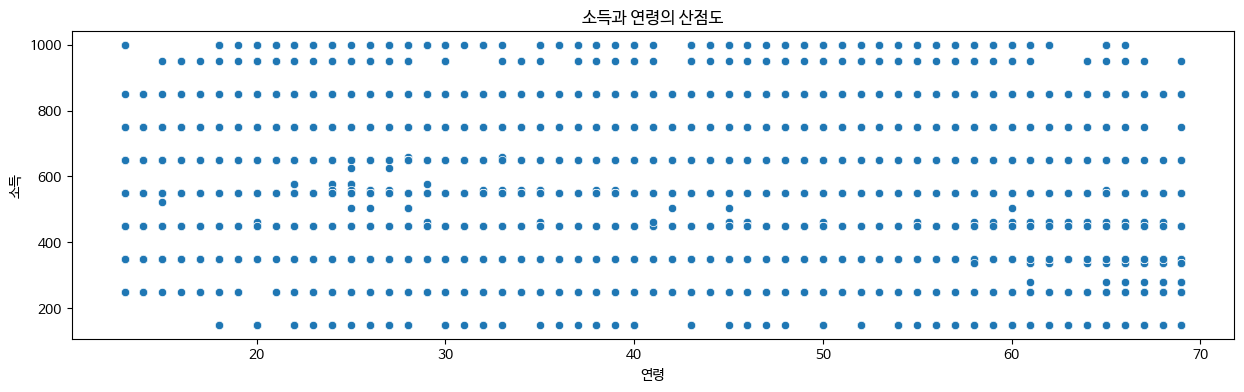

In [20]:
# prompt: 소득과 연령의 산점도
plt.figure(figsize=(15, 4))
sns.scatterplot(x='연령', y='소득', data=df)
plt.title('소득과 연령의 산점도')
plt.xlabel('연령')
plt.ylabel('소득')
plt.show()


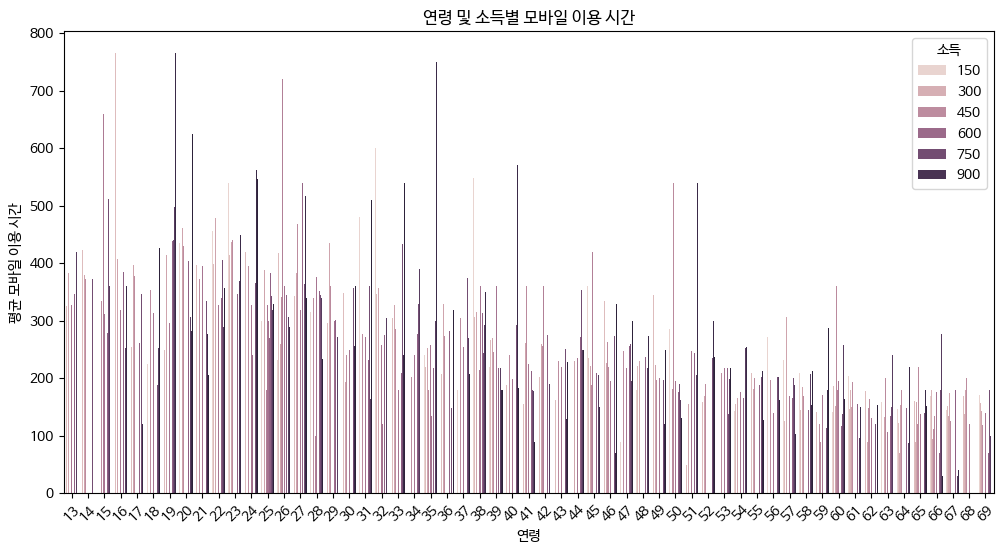

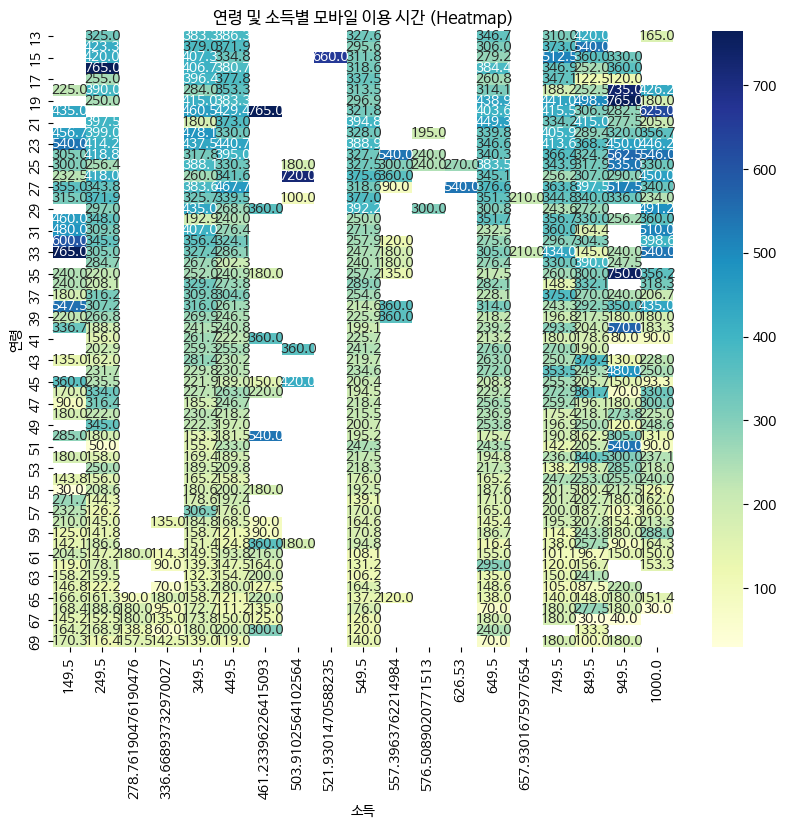

In [19]:
# prompt: 연령, 소득별로 모바일 이용시간을 시각화

# Assuming 'df' is your DataFrame with '연령', '소득', and mobile usage columns

# Create a combined mobile usage column (if not already present)
df['모바일총사용시간'] = df['평일모바일'] + df['토요일모바일'] + df['일요일모바일']

# Group data by age and income
grouped_data = df.groupby(['연령', '소득'])['모바일총사용시간'].mean().reset_index()


# Create the visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='연령', y='모바일총사용시간', hue='소득', data=grouped_data)
plt.title('연령 및 소득별 모바일 이용 시간')
plt.xlabel('연령')
plt.ylabel('평균 모바일 이용 시간')
plt.xticks(rotation=45)
plt.legend(title='소득')
plt.show()


# Alternative visualization using a heatmap
plt.figure(figsize=(10, 8))
pivot_table = grouped_data.pivot(index='연령', columns='소득', values='모바일총사용시간')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('연령 및 소득별 모바일 이용 시간 (Heatmap)')
plt.xlabel('소득')
plt.ylabel('연령')
plt.show()

### **기말과제 : EDA(기초통계분석과 시각화) 보고서를 작성하라**
#### **시공간, 그룹 별로 EDA를 수행하라**
- **[시각화 참고자료](https://github.com/ancestor9/beat-master/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EB%8F%84%EC%9E%A5%EA%B9%A8%EA%B8%B0.pdf)**